In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("./ai4i2020.csv")
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df = df.drop(['UDI','Product ID'], axis=1)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [6]:
df_cat = df[['Type']]
df_cat

,Type
0,M
1,L
2,L
3,L
4,L
...,...
9995,M
9996,H
9997,M
9998,H


In [7]:
df_num = df.drop(['Type','Machine failure','TWF','HDF','PWF','OSF','RNF'], axis=1)
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
df_num = scaler.fit_transform(df_num)
df_num

array([[0.30434783, 0.35802469, 0.22293364, 0.53571429, 0.        ],
       [0.31521739, 0.37037037, 0.13969732, 0.58379121, 0.01185771],
       [0.30434783, 0.34567901, 0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.40217391, 0.35802469, 0.27764843, 0.40659341, 0.08695652],
       [0.40217391, 0.37037037, 0.13969732, 0.61401099, 0.09881423],
       [0.40217391, 0.37037037, 0.19324796, 0.5       , 0.11857708]])

In [10]:
df_num = pd.DataFrame(df_num, columns = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]'
                                         ,'Torque [Nm]','Tool wear [min]'])
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...
9995,0.380435,0.333333,0.253783,0.353022,0.055336
9996,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.402174,0.358025,0.277648,0.406593,0.086957
9998,0.402174,0.370370,0.139697,0.614011,0.098814


In [11]:
# Alternate method for converting catagorical data to numerical data
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# cat = encoder.fit_transform(df_cat[['Type']]).toarray()

In [12]:
cat = pd.get_dummies(df_cat[['Type']], dtype=float)
df_cat = pd.DataFrame(cat)

df_cat

,Type_H,Type_L,Type_M
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,1.0,0.0,0.0
9997,0.0,0.0,1.0
9998,1.0,0.0,0.0


In [13]:
X = pd.concat([df_cat,df_num],axis=1)
X
X.columns

Index(['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]'],
      dtype='object')

In [14]:
y = df[['Machine failure']]
y

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=101)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 8)
(8000, 8)
(2000, 1)
(8000, 1)


In [23]:
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import confusion_matrix


target_names=["Machine Failure"]


In [26]:
#FIRST DRAFT
#FITTING
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
#PREDICTING
dt_prediction = dt_model.predict(X_test)
#STATS
dt_acc = accuracy_score(y_test,dt_prediction)
dt_cm = confusion_matrix(y_test, dt_prediction)
#classification report
target_names=["Machine Failure"]


dt_report = classification_report(y_test, dt_prediction, labels=[0,1], target_names=target_names)



C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2555: UserWarning: labels size, 2, does not match size of target_names, 1
  warnings.warn(


In [73]:
#VALIDATION TEST
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
#This code selects which scores will be used in the cross validation estimator

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
#FITTING
decision_tree_model = DecisionTreeClassifier().fit(X_train, y_train)
#PREDICTING
decision_tree_prediction = decision_tree_model.predict(X_test)
#STATS
decision_tree_acc = accuracy_score(y_test,decision_tree_prediction)
decision_tree_cm = confusion_matrix(y_test, decision_tree_prediction)
#classification report
target_names=["Machine Failure"]
decision_tree_report = classification_report(y_test, decision_tree_prediction, labels=[0,1], target_names=target_names)
#CROSS VALIDATION
decision_tree_cv_scores = cross_validate(decision_tree_model, X, y, cv=5, scoring=scoring)


C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2555: UserWarning: labels size, 2, does not match size of target_names, 1
  warnings.warn(


In [74]:
print(decision_tree_acc)
print(decision_tree_cm)
print(decision_tree_report)
print(decision_tree_cv_scores)

0.973875
[[7619  100]
 [ 109  172]]
                 precision    recall  f1-score   support

Machine Failure       0.99      0.99      0.99      7719

       accuracy                           0.97      8000
      macro avg       0.81      0.80      0.80      8000
   weighted avg       0.97      0.97      0.97      8000

{'fit_time': array([0.02202749, 0.02001929, 0.02301526, 0.01901722, 0.01801825]), 'score_time': array([0.00700283, 0.0071342 , 0.00650787, 0.00750709, 0.0085113 ]), 'test_acc': array([0.9665, 0.964 , 0.536 , 0.952 , 0.98  ]), 'test_prec_macro': array([0.74449686, 0.72380905, 0.5248303 , 0.65394593, 0.86831276]), 'test_rec_micro': array([0.83138498, 0.70469492, 0.68889295, 0.68429546, 0.80520034])}


Random forest   

RandomForestClassifier(n_estimators=10)

In [30]:
# DRAFT
from sklearn.ensemble import RandomForestClassifier

rf_model =  RandomForestClassifier(n_estimators=10)
rf_model.fit(X_train, y_train.values.ravel())


rf_prediction = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_prediction)
dt_acc = accuracy_score(y_test,rf_prediction)
target_names=["Machine Failure"]
rf_report = classification_report(y_test, rf_prediction, labels=[0,1], target_names=target_names)
print(rf_cm)
print(dt_acc)
print(rf_report)

C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2555: UserWarning: labels size, 2, does not match size of target_names, 1
  warnings.warn(


In [76]:
#VALIDATION TEST
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
#This code selects which scores will be used in the cross validation estimator

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
#FITTING
random_forest_model = RandomForestClassifier(n_estimators=10)
random_forest_model.fit(X_train, y_train.values.ravel())
#PREDICTING
random_forest_prediction = random_forest_model.predict(X_test)
#STATS
random_forest_acc = accuracy_score(y_test,random_forest_prediction)
random_forest_cm = confusion_matrix(y_test, random_forest_prediction)
#classification report
target_names=["Machine Failure"]
random_forest_report = classification_report(y_test, random_forest_prediction, labels=[0,1], target_names=target_names)
#CROSS VALIDATION
random_forest_cv_scores = cross_validate(decision_tree_model, X, y, cv=5, scoring=scoring)

C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2555: UserWarning: labels size, 2, does not match size of target_names, 1
  warnings.warn(


In [78]:
print(random_forest_acc)
print(random_forest_cm)
print(random_forest_report)
print(random_forest_cv_scores)


0.9715
[[7699   20]
 [ 208   73]]
                 precision    recall  f1-score   support

Machine Failure       0.97      1.00      0.99      7719

       accuracy                           0.97      8000
      macro avg       0.88      0.63      0.69      8000
   weighted avg       0.97      0.97      0.96      8000

{'fit_time': array([0.02286506, 0.01956463, 0.02401161, 0.01951551, 0.01801181]), 'score_time': array([0.00750589, 0.00650454, 0.0075078 , 0.00650692, 0.00800323]), 'test_acc': array([0.9655, 0.9635, 0.532 , 0.9515, 0.9805]), 'test_prec_macro': array([0.7384235 , 0.72009162, 0.52548099, 0.65647325, 0.86669898]), 'test_rec_micro': array([0.81645961, 0.70443612, 0.6939167 , 0.69822494, 0.81964742])}


<Axes: >

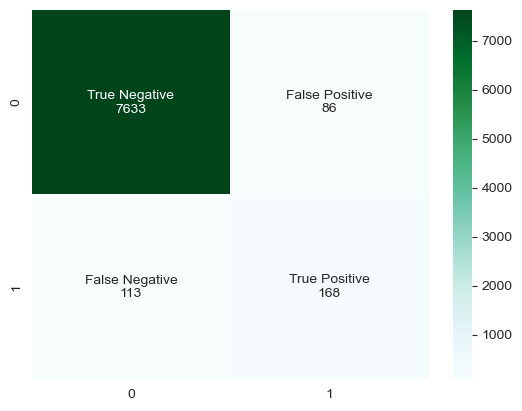

In [60]:
#VISUALIZATION DT CM
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
mat_counts = ['{0:0.0f}'.format(value) for value in dt_cm.flatten()]
labels = [f'{label}\n{count}' for label, count in zip(labels,mat_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(dt_cm, annot=labels, fmt='', cmap="BuGn")

<Axes: >

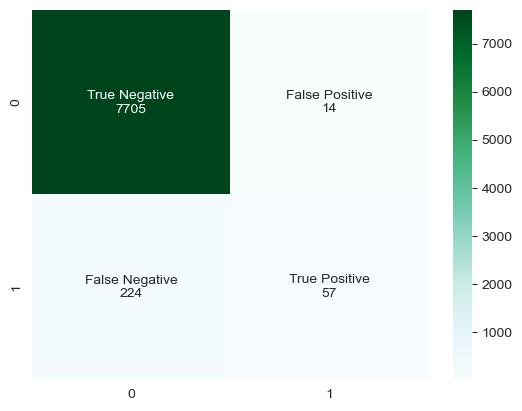

In [56]:
#VISUALIZATION RF CM
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
mat_counts = ['{0:0.0f}'.format(value) for value in rf_cm.flatten()]
labels = [f'{label}\n{count}' for label, count in zip(labels,mat_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rf_cm, annot=labels, fmt='', cmap='BuGn')

In [66]:
X.columns

Index(['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]'],
      dtype='object')